<a href="https://colab.research.google.com/github/satyambhatt5/Data_science/blob/main/coloum_selector_chrun_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.compose import make_column_selector
# Model Building and Evaluation modules
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,r2_score
# Importing calibration modules

from sklearn.calibration import calibration_curve, CalibratedClassifierCV
 
 
 #MODEL BUILDING ALGORTHIM 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
#neural network with tensor flow and kearas
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout




In [ ]:
cd=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practice Data Set/customer_churn.csv")
cd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#

In [ ]:
cd.head()
cd.shape
#cd.info()
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
cd.dtypes #type of the value

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#convert the object to the numetric value 

cd.TotalCharges = pd.to_numeric(cd.TotalCharges, errors='coerce')
cd.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:

#Removing missing values 

cd.dropna(inplace = True)
#remove the customer id 
cd1=cd.iloc[:,1:]


In [ ]:
ohe=OneHotEncoder()
lb=LabelEncoder()
sc=MinMaxScaler()
lr=LogisticRegression()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ec=ExtraTreesClassifier()
sv=SVC()
gb=GaussianNB()
gbc=GradientBoostingClassifier()

l=[lr,dc,rf,ec,sv,gb,gbc]
l

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                  

In [ ]:
ct=make_column_transformer((MinMaxScaler(),make_column_selector(dtype_include= np.number)),
                           (OneHotEncoder(),make_column_selector(dtype_include=object)))

In [ ]:
y=cd1['Churn'].values
X=cd1.drop(columns=['Churn'])


In [ ]:
#use of the label encoder to encode the value 
y=lb.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
x=ct.fit_transform(X)
x

#[expression for item in list]

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=42)



In [ ]:
model=rf.fit(x_train,y_train)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test=model.predict(x_test)
prediction_test

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,prediction_test)

confusion_matrix(y_test,prediction_test)

print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.61      0.48      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [ ]:
model=rf.fit(x_train,y_train)

In [ ]:
y_pred =model.predict(x_test)


In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [ ]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}


log_primal_Grid = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=10)


log_primal_Grid.fit(x,y)

best_model(log_primal_Grid)

0.8044656423768265
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [ ]:
#random forest 
param_grid_rf = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
log_primal_grid_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_grid_rf,cv=5)

log_primal_grid_rf.fit(x,y)
best_model(log_primal_grid_rf)

0.8043215137480653
{'max_depth': 7, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(x,y)
best_model(xgb_grid)

0.8050314370031574
{'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 20}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


ValueError: ignored

In [ ]:
 #Convertin the predictor variable in a binary numeric variable

#cd1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
#cd1['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
#cd1.Churn.unique()
#cd1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [ ]:
#Tasks to be performed:
#1. Sam has to build a model on top of the customer_churn dataset:
#a. To find out how does ‘tenure’ change/vary w.r.t change in ‘MonthlyCharges’ of the
#customer
#b. To find out how does ‘tenure’ change/vary w.r.t change in ‘TotalCharges’ of the
#customer.
#c. To understand which factor influences the ‘tenure’ of the customer more ->
#‘MonthlyCharges’ or ‘TotalCharges’


In [ ]:
import pandas_profiling


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=d929b358998090aded8956fa28f8a3558d1e40357e085ba2462eefd47e25f8b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-c6phrud6/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
import numpy as np
from pandas_profiling import profile_report

In [ ]:
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


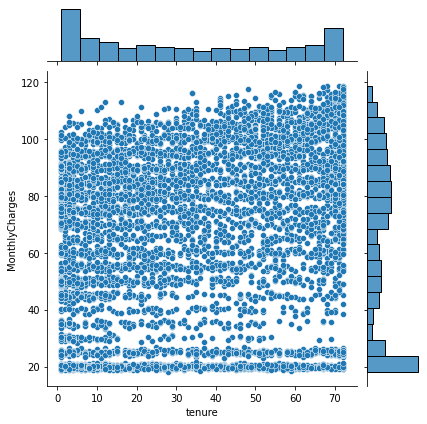

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.jointplot(df.tenure,df.MonthlyCharges)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


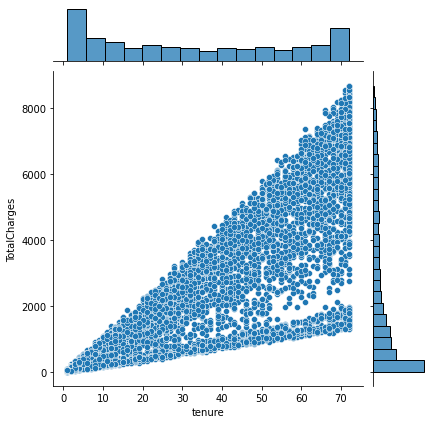

In [ ]:
sns.jointplot(df.tenure,df.TotalCharges)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


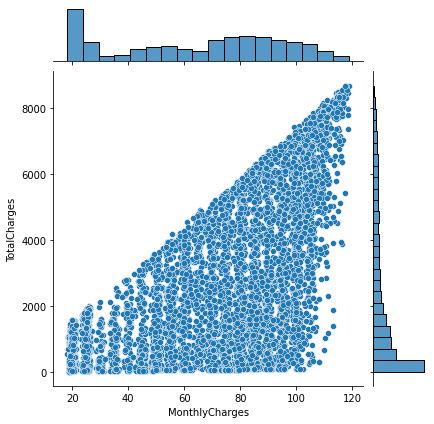

In [ ]:
sns.jointplot(df.MonthlyCharges,df.TotalCharges)

In [ ]:
#scaling the data and transform the data 

y=df['Churn'].values
X=df.drop(columns=['Churn'])
#scaling all  the variable 0 to 1 

from sklearn.preprocessing import MinMaxScaler
features= X.columns.values 
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features





In [ ]:
#create train and test data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape)

(4922, 45)
(2110, 45)
(4922,)
(2110,)


In [ ]:
#running the logistic model  
from sklearn.linear_model import LogisticRegression


In [ ]:
model= LogisticRegression()


In [ ]:
model.fit(X=X_train,y=y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
prediction_test=model.predict(X_test)

In [ ]:
#print the accuracy of the model   
metrics.accuracy_score(y_test,prediction_test)


0.795734597156398

In [ ]:
metrics.roc_auc_score(y_test,prediction_test)

0.7113686134116772

In [ ]:
metrics.balanced_accuracy_score(y_test,prediction_test)

0.7113686134116772

In [ ]:
#decision tree  model
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)  



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.7203791469194313

In [ ]:
#Random forest building  model  
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_test=rf.predict(X_test)

In [ ]:
#accuracy score 
accuracy_score(y_test,y_pred_test)

0.7729857819905214

In [ ]:
#confusion metric 
from sklearn.metrics import confusion_matrix
 


In [ ]:
confusion_matrix(y_test,y_pred_test)

array([[1369,  180],
       [ 299,  262]])

In [ ]:
# source: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_
#dataset.html#
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
# import some data to play with
iris = datasets.load_iris()
Y = iris.target



# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap=plt.
cm.Paired)




ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()
